<a href="https://colab.research.google.com/github/com0040/offline_alpaco/blob/main/22_11_25_CNN_%EB%A6%AC%EB%B7%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

완전연결계층 - 효과가 미미

- 필터를 먹여 성능업

- 필터를 먹인게 이쁜이미지 x

컨볼루전 + 클래시피케이션

### **코스트가 최소가 되게하는 필터의 웨이트**

## 필터를 만들 때

1. 부분적 - 로컬 리셉티브 필드

2. 2차원 특징을 그대로

- 나이브한 필터를 여러개 > 큰 필터 조금

## 합성곱 = 가중합

필터의 크기가 작으므로 스트라이드를 걸어서 슬라이딩

- 필터의 크기랑 상관없이 - 결과값 하나 = 피처맵 = 슬라이딩 횟수

연산 - 수학적 < 구조적 이해


## 피처맵 역추적 ㅎㅎㅎ

골때려 (월드컵)

이해도가 올라간다.

- 알고있는 느낌 : 의심 -> 내가 알고 있는게 맞나

## 리서치적 관점 <-> 엔지니어적 관점

성장속도 <-> 내공

## 패딩

원본의 크기를 유지하는게 왜 중요해?

- 구조적으로 유지시킨다는 사실자체가 다가아니다. : 구조적 짜임새가 유지된다.

심오한 부분 -> 9개를 컨볼루전 

- 패딩 : 3바이3의 중심이 1,1 을 가리킨다.

- 역추적(2층 3층)했을 때 1,1에는 주위에 요소들도 같이 들어간다.

0을 준다 -> 제로패딩

3X3 필터 -> 주변에 1칸 덧대준다.

5X5 필터 -> 주변에 2칸 덧대준다.

- 필터의 크기에 따라 패딩 크기가 정해진다.(필터는 내가 정해)

- 짝수를 주긴한다.(한쪽만)


## 스트라이드 - 2칸주면 안돼요?

피처맵의 크기가 SPERSE 해진다.

2칸가면 절반으로 줄어든다.

## 심오한 질문: 패딩 - 스트라이드 2 일때

절반으로 준다.(정확하게 절반으로)

## 크기를 키우는 패딩

다루지 않는다.

## 필터링 할때 일어나는 일

1,1 주변에 필터 후에 또 필터를 걸려면

계속해서 1,1이 메인으로 가게된다.



- 1,1에 인접한 나머지 3개는 : 그보다 더 주변을 압축한것이므로 리셉티브 필드가 늘어난다.

: 무슨 느낌이냐면

- 주위에 주위에 주위에 주위

- 인접한 영역들의 패턴 : 물방울 파동느낌 -> 모공 -> 얼굴 -> 사람 -> 전신 -> 풍경

## 컬러 이미지라면

같은 필터로 3번 적용 후 더해준당

기준이 뭔지 모르겠어.(피처맵 봐도 모름)

# 풀링

채널 x 면적을 줄인다.

- 계산 x

- 최대 최소 평균 

- 안 곂치게 하겠다.

학습이 아니다

- 하나를 선택  0, 1 / 최대가 아니면 버린다(0) 최대면 뽑는다(1)

- 풀링 전 - 안경 씀(디테일) 정보량 많다

- 풀링 후 - 안경 벗음(일반화) 정보량 적다.

이미지 - 데이터 엄첨 크다.

- 멀리 보는 거다. 

# 완전연결 계층

CNN 기본구조

완전연결계층 VS 합성곱

3차원 -> 1차원 으로 필 것이다. : 1차원으로 핀 피처맵

CNN -> 필터 - 웨이트 매우 감소 <-> 완전연결

1) 2차원 위치정보

2) 부분적 영역

3) SPARSE 느슨한 구조

# 전체적인 구조

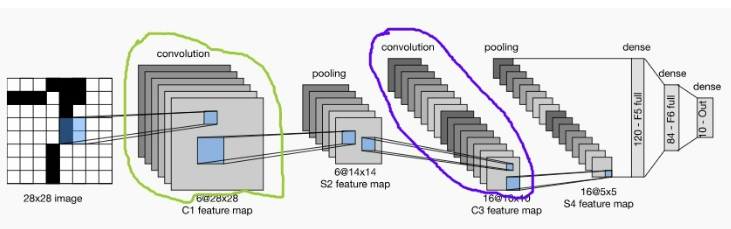

이미지 갯수가 늘어나도 웨이트는 그대로

# 층이 많아진다 =

비선형성 -> 선형성

- 오버핏

- 언더핏

선형성으로는 절대 못 푸는 문제 -> 깊게 쌓자

알랙스넷 

- 드롭아웃, 렐루

- 8층 이상 -> 성능저하

구글넷

- 어케 21층 쌓았누

# 열량

최신 논문 구현 잘하는 친구 -> 당장 필요하진 않아.

그냥 코딩 잘하는 애 필요.

성능개선은 -> 최신논문 구현 못해도 가능해



# 웨이트와 피처맵 사이즈 예제

In [ ]:
#모델 구축
model = models.Sequential()
## filtering layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
# weight의 갯수 : (3 x 3 x 1 + 1) x 64 / fiture map size = 26,26,64
model.add(layers.MaxPooling2D((2, 2)))
# fiture map size = 13,13,64
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# weight의 갯수 : (3 x 3 x 64 + 1) x 128 / fiture map size = 11,11,128
model.add(layers.MaxPooling2D((2, 2)))
# fiture map size = 5,5,128
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# weight의 갯수 : (3 x 3 x 128 + 1) x 256 / fiture map size = 3,3,256


## classification layer
model.add(layers.Flatten())
# fiture map size = 3 x 3 x 256
model.add(layers.Dense(32, activation='relu'))
# weight의 갯수 : (3 x 3 x 256 + 1) x 32 / fiture map size = 32
model.add(layers.Dense(10, activation='softmax')) 
# weight의 갯수 : (32 + 1) x 10 + / fiture map size = 10